<h2> Importação e Diretórios

In [ ]:
# Diretórios
caminho_arquivo = r'..\support-tickets-analytics\data\processed\2025-07-01_processed.csv'

# Instalação das bibliotecas
#!pip install matplotlib --quiet # Desmarque a linha se estiver rodando fora do Jupyter Notebook 
#!pip install pandas --quiet # Desmarque a linha se estiver rodando fora do Jupyter Notebook

# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Lendo o arquivo CSV
df = pd.read_csv(caminho_arquivo, sep=';', encoding='utf-8', on_bad_lines='skip', engine='python')
df


,id,titulo,equipamento_qtd,data_abertura,requerente,localizacao,g_responsavel,status,data_fechamento,contato,responsavel,equipamento
0,30212,Suporte à estação de trabalho,0,2025-07-01,USER_001,LOC_001,Bancada,Atribuído,NaN,Whatsapp,Informática,NaN
1,30210,Suporte à estação de trabalho,0,2025-07-01,USER_002,LOC_001,Suporte N2,Fechado,2025-07-03,Sistema,Informática,NaN
2,30167,Suporte à estação de trabalho,0,2025-07-01,USER_003,LOC_001,Suporte N2,Pendente,NaN,Sistema,Informática,NaN
3,30159,Suporte à estação de trabalho,0,2025-07-01,USER_004,LOC_002,Bancada,Atribuído,NaN,800,gestor_3,NaN
4,30158,Suporte à estação de trabalho,0,2025-07-01,USER_005,LOC_001,Suporte N2,Fechado,2025-07-05,Whatsapp,Informática,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218,2733,Solicitação de equipamento - Periférico - Mouse,1,2025-01-15,USER_113,LOC_001,Estagiário,Estoque,NaN,Whatsapp,Informática,Periférico - Mouse
219,2727,Solicitação de equipamento - Periférico - Mouse,1,2025-01-15,USER_096,LOC_037,Suporte N2,Estoque,NaN,Sistema,gestor_4,Periférico - Mouse
220,1904,Solicitação de equipamento - Periférico - Mouse,2,2025-01-09,USER_016,LOC_001,Estagiário,Estoque,NaN,Whatsapp,Informática,Periférico - Mouse
221,1810,Solicitação de equipamento - Periférico - Mouse,3,2025-01-09,USER_120,LOC_001,Suporte N2,Estoque,NaN,Sistema,Informática,Periférico - Mouse


<h1> Data Manipulation

In [27]:
# Extraindo o mês e o ano da coluna de data
df['data_abertura'] = pd.to_datetime(df['data_abertura'], errors='coerce')
df['mes'] = df['data_abertura'].dt.month
df['ano'] = df['data_abertura'].dt.year
df['data_abertura'] = df['data_abertura'].dt.strftime('%Y-%m-%d')
df


,id,titulo,equipamento_qtd,data_abertura,requerente,localizacao,g_responsavel,status,data_fechamento,contato,responsavel,equipamento,mes,ano
0,30212,Suporte à estação de trabalho,0,2025-07-01,USER_001,LOC_001,Bancada,Atribuído,NaN,Whatsapp,Informática,NaN,7,2025
1,30210,Suporte à estação de trabalho,0,2025-07-01,USER_002,LOC_001,Suporte N2,Fechado,2025-07-03,Sistema,Informática,NaN,7,2025
2,30167,Suporte à estação de trabalho,0,2025-07-01,USER_003,LOC_001,Suporte N2,Pendente,NaN,Sistema,Informática,NaN,7,2025
3,30159,Suporte à estação de trabalho,0,2025-07-01,USER_004,LOC_002,Bancada,Atribuído,NaN,800,gestor_3,NaN,7,2025
4,30158,Suporte à estação de trabalho,0,2025-07-01,USER_005,LOC_001,Suporte N2,Fechado,2025-07-05,Whatsapp,Informática,NaN,7,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2733,Solicitação de equipamento - Periférico - Mouse,1,2025-01-15,USER_113,LOC_001,Estagiário,Estoque,NaN,Whatsapp,Informática,Periférico - Mouse,1,2025
219,2727,Solicitação de equipamento - Periférico - Mouse,1,2025-01-15,USER_096,LOC_037,Suporte N2,Estoque,NaN,Sistema,gestor_4,Periférico - Mouse,1,2025
220,1904,Solicitação de equipamento - Periférico - Mouse,2,2025-01-09,USER_016,LOC_001,Estagiário,Estoque,NaN,Whatsapp,Informática,Periférico - Mouse,1,2025
221,1810,Solicitação de equipamento - Periférico - Mouse,3,2025-01-09,USER_120,LOC_001,Suporte N2,Estoque,NaN,Sistema,Informática,Periférico - Mouse,1,2025


In [28]:
# Adicionando a coluna entre os dias de abertura e fechamento
df['abertura_fechamento'] = (pd.to_datetime(df['data_fechamento'], errors='coerce') - pd.to_datetime(df['data_abertura'], errors='coerce')).dt.days
df['abertura_fechamento'] = df['abertura_fechamento'].fillna(0).astype(int)
df

,id,titulo,equipamento_qtd,data_abertura,requerente,localizacao,g_responsavel,status,data_fechamento,contato,responsavel,equipamento,mes,ano,abertura_fechamento
0,30212,Suporte à estação de trabalho,0,2025-07-01,USER_001,LOC_001,Bancada,Atribuído,NaN,Whatsapp,Informática,NaN,7,2025,0
1,30210,Suporte à estação de trabalho,0,2025-07-01,USER_002,LOC_001,Suporte N2,Fechado,2025-07-03,Sistema,Informática,NaN,7,2025,2
2,30167,Suporte à estação de trabalho,0,2025-07-01,USER_003,LOC_001,Suporte N2,Pendente,NaN,Sistema,Informática,NaN,7,2025,0
3,30159,Suporte à estação de trabalho,0,2025-07-01,USER_004,LOC_002,Bancada,Atribuído,NaN,800,gestor_3,NaN,7,2025,0
4,30158,Suporte à estação de trabalho,0,2025-07-01,USER_005,LOC_001,Suporte N2,Fechado,2025-07-05,Whatsapp,Informática,NaN,7,2025,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2733,Solicitação de equipamento - Periférico - Mouse,1,2025-01-15,USER_113,LOC_001,Estagiário,Estoque,NaN,Whatsapp,Informática,Periférico - Mouse,1,2025,0
219,2727,Solicitação de equipamento - Periférico - Mouse,1,2025-01-15,USER_096,LOC_037,Suporte N2,Estoque,NaN,Sistema,gestor_4,Periférico - Mouse,1,2025,0
220,1904,Solicitação de equipamento - Periférico - Mouse,2,2025-01-09,USER_016,LOC_001,Estagiário,Estoque,NaN,Whatsapp,Informática,Periférico - Mouse,1,2025,0
221,1810,Solicitação de equipamento - Periférico - Mouse,3,2025-01-09,USER_120,LOC_001,Suporte N2,Estoque,NaN,Sistema,Informática,Periférico - Mouse,1,2025,0


<h2> Data Exploration </h2> 

In [115]:
import sys

# Caminho absoluto para a pasta onde está o eda.py
sys.path.append('\\support-tickets-analytics\\scripts')
sys.path.append('\\support-tickets-analytics\\reports')


# Agora tente importar diretamente
import eda

# Explorando o DataFrame
eda.rows_cols(df)
print('\n')
eda.explorar_df(df)

Linhas: 223
Colunas: 15


--- Visão Geral ---
Número de linhas: 223
Número de colunas: 15

--- Tipos de Dados ---
id                      int64
titulo                 object
equipamento_qtd         int64
data_abertura          object
requerente             object
localizacao            object
g_responsavel          object
status                 object
data_fechamento        object
contato                object
responsavel            object
equipamento            object
mes                     int32
ano                     int32
abertura_fechamento     int64
dtype: object

--- Valores Ausentes por Coluna ---
id                       0
titulo                   0
equipamento_qtd          0
data_abertura            0
requerente               0
localizacao              0
g_responsavel            0
status                   0
data_fechamento        195
contato                  0
responsavel              0
equipamento             82
mes                      0
ano                      0
abertur

In [34]:
# Verifique os nomes das colunas para encontrar o correto para a data de abertura
print(df.columns)

Index(['id', 'titulo', 'equipamento_qtd', 'data_abertura', 'requerente',
       'localizacao', 'g_responsavel', 'status', 'data_fechamento', 'contato',
       'responsavel', 'equipamento', 'mes', 'ano', 'abertura_fechamento'],
      dtype='object')


In [35]:
# Filtrando os dados para o mês de julho de 2025
df_julho_2025 = df[(df['mes'] == 7) & (df['ano'] == 2025)].reset_index(drop=True)
df_julho_2025


,id,titulo,equipamento_qtd,data_abertura,requerente,localizacao,g_responsavel,status,data_fechamento,contato,responsavel,equipamento,mes,ano,abertura_fechamento
0,30212,Suporte à estação de trabalho,0,2025-07-01,USER_001,LOC_001,Bancada,Atribuído,NaN,Whatsapp,Informática,NaN,7,2025,0
1,30210,Suporte à estação de trabalho,0,2025-07-01,USER_002,LOC_001,Suporte N2,Fechado,2025-07-03,Sistema,Informática,NaN,7,2025,2
2,30167,Suporte à estação de trabalho,0,2025-07-01,USER_003,LOC_001,Suporte N2,Pendente,NaN,Sistema,Informática,NaN,7,2025,0
3,30159,Suporte à estação de trabalho,0,2025-07-01,USER_004,LOC_002,Bancada,Atribuído,NaN,800,gestor_3,NaN,7,2025,0
4,30158,Suporte à estação de trabalho,0,2025-07-01,USER_005,LOC_001,Suporte N2,Fechado,2025-07-05,Whatsapp,Informática,NaN,7,2025,4
5,30128,Solicitação de equipamento - Computador,3,2025-07-01,USER_006,LOC_001,Suporte N2,Estoque,NaN,Sistema,Informática,Computador,7,2025,0
6,30127,Suporte em eventos,0,2025-07-01,USER_007,LOC_003,Equipe Regional,Atribuído,NaN,Whatsapp,gestor_2,NaN,7,2025,0
7,30123,Suporte em eventos,0,2025-07-01,USER_007,LOC_003,Equipe Regional,Pendente,NaN,Sistema,gestor_2,NaN,7,2025,0
8,30115,Suporte em eventos,0,2025-07-01,USER_007,LOC_003,Equipe Regional,Fechado,2025-07-04,Sistema,gestor_2,NaN,7,2025,3
9,30078,Estabilizador/No-break,0,2025-07-01,USER_008,LOC_004,Suporte N2,Atribuído,NaN,800,gestor_1,NaN,7,2025,0


In [50]:
# Quantitativo de tickets por atribuído - grupo técnico
df_responsavel = df['g_responsavel'].value_counts()

# Quantitativo de tickets por stauts
df_status = df['status'].value_counts()

# Quantitativo de tickets por localização
df_localizacao = df['localizacao'].value_counts()

# Quantitativo de tickets por equipamento
df_equipamento = df['equipamento'].value_counts()

#Quantitativo de tickets por mês
df_mes = df['mes'].value_counts().sort_index()

# Quantitativo de canal de atendimento
df_canal = df['contato'].value_counts()

# Evolução do número de chamados ao longo do tempo
df_evolucao = df.groupby(['ano', 'mes']).size().reset_index(name='quantidade')


# Visualizando os DataFrames
from IPython.display import display

print('--- Quadro de quantitativo - Grupo Técnico --- \n')
display(df_responsavel)

print('--- Quadro de quantitativo - Status --- \n')
display(df_status)

print('--- Quadro de quantitativo --- Localização --- \n')
display(df_localizacao)

print('--- Quadro de quantitativo - Equipamento --- \n')
display(df_equipamento)

print('--- Quadro de quantitativo - Mês --- \n')
display(df_mes)

print('--- Quadro de quantitativo - Canal de Atendimento --- \n')
display(df_canal)

print('--- Evolução do número de chamados ao longo do tempo --- \n')
display(df_evolucao)


--- Quadro de quantitativo - Grupo Técnico --- 



g_responsavel
Suporte N2            187
Bancada                15
Estagiário             10
Equipe Regional         5
Eventos                 5
Apoio a Estagiário      1
Name: count, dtype: int64

--- Quadro de quantitativo - Status --- 



status
Estoque      135
Atribuído     50
Fechado       28
Pendente      10
Name: count, dtype: int64

--- Quadro de quantitativo --- Localização --- 



localizacao
LOC_001    98
LOC_005    28
LOC_003     9
LOC_012     9
LOC_007     4
LOC_009     4
LOC_006     4
LOC_019     4
LOC_016     3
LOC_013     3
LOC_010     3
LOC_025     3
LOC_037     3
LOC_036     3
LOC_034     3
LOC_011     2
LOC_008     2
LOC_004     2
LOC_002     2
LOC_024     2
LOC_021     2
LOC_023     2
LOC_040     2
LOC_030     2
LOC_015     2
LOC_018     2
LOC_014     2
LOC_032     2
LOC_041     2
LOC_027     1
LOC_022     1
LOC_017     1
LOC_026     1
LOC_020     1
LOC_028     1
LOC_035     1
LOC_033     1
LOC_029     1
LOC_031     1
LOC_039     1
LOC_038     1
LOC_042     1
LOC_043     1
Name: count, dtype: int64

--- Quadro de quantitativo - Equipamento --- 



equipamento
Computador               103
Periférico - Mouse        12
Periférico - Fone         11
Periférico - Webcam        7
Periférico - Teclado       6
Estabilizador/Nobreak      1
Monitor                    1
Name: count, dtype: int64

--- Quadro de quantitativo - Mês --- 



mes
1    14
2    13
3    18
4    25
5    57
6    83
7    13
Name: count, dtype: int64

--- Quadro de quantitativo - Canal de Atendimento --- 



contato
Sistema     105
Whatsapp     97
800          21
Name: count, dtype: int64

--- Evolução do número de chamados ao longo do tempo --- 



,ano,mes,quantidade
0,2025,1,14
1,2025,2,13
2,2025,3,18
3,2025,4,25
4,2025,5,57
5,2025,6,83
6,2025,7,13


In [105]:
# Criar uma coluna 'data' no formato datetime, assumindo que 'ano' e 'mes' estão no DataFrame
df_evolucao['data'] = pd.to_datetime(df_evolucao['ano'].astype(str) + '-' + df_evolucao['mes'].astype(str))
# Agrupar por 'data' se necessário
df_agregado = df_evolucao.groupby('data')['quantidade'].sum().reset_index()
df_agregado

,data,quantidade
0,2025-01-01,14
1,2025-02-01,13
2,2025-03-01,18
3,2025-04-01,25
4,2025-05-01,57
5,2025-06-01,83
6,2025-07-01,13


<h1> Visualização de dados

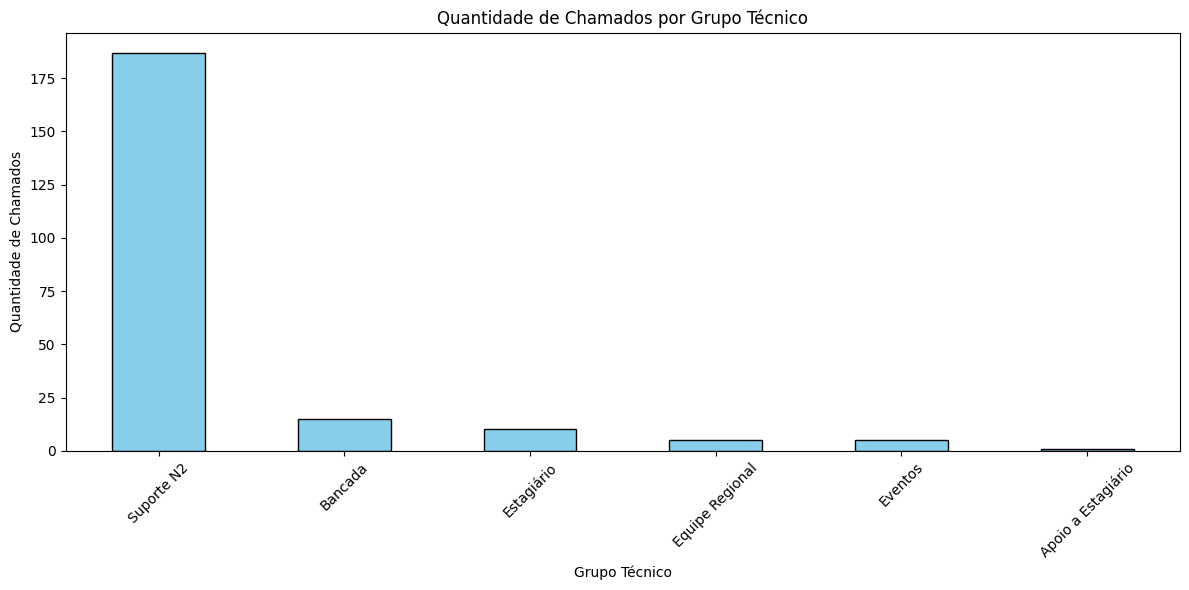

In [ ]:
# Visualização quantitativo - Grupo Técnico
plt.figure(figsize=(12, 6))
df_responsavel.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Quantidade de Chamados por Grupo Técnico')
plt.xlabel('Grupo Técnico')
plt.ylabel('Quantidade de Chamados')
plt.xticks(rotation=45)
plt.tight_layout()
# Salvando o gráfico
plt.savefig(r'..\support-tickets-analytics\reports\quantitativo_chamados_por_grupo_tecnico.png')
plt.show()


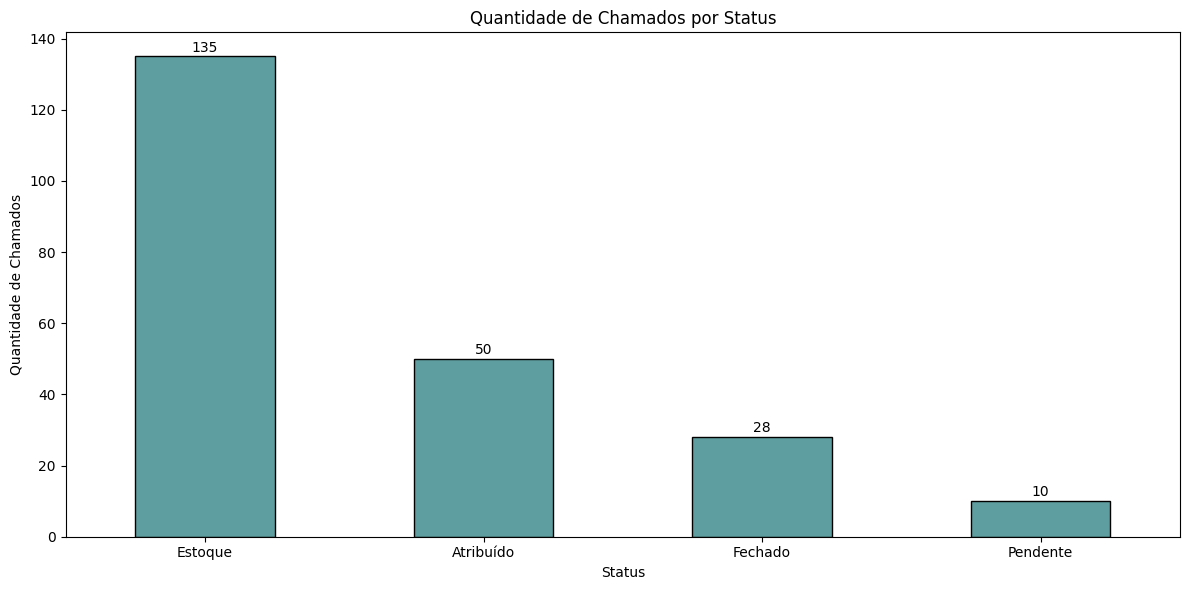

In [ ]:
# Visualização quantitativo - Status
plt.figure(figsize=(12, 6))
bars = df_status.plot(kind='bar', color='#5F9EA0', edgecolor='black')
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.5, 
             int(bar.get_height()), 
             ha='center', va='bottom')
plt.title('Quantidade de Chamados por Status')
plt.xlabel('Status')
plt.ylabel('Quantidade de Chamados')
plt.xticks(rotation=0)
plt.tight_layout()
# Salvando o gráfico
plt.savefig(r'..\support-tickets-analytics\reports\quantitativo_chamados_por_status.png')
plt.show()


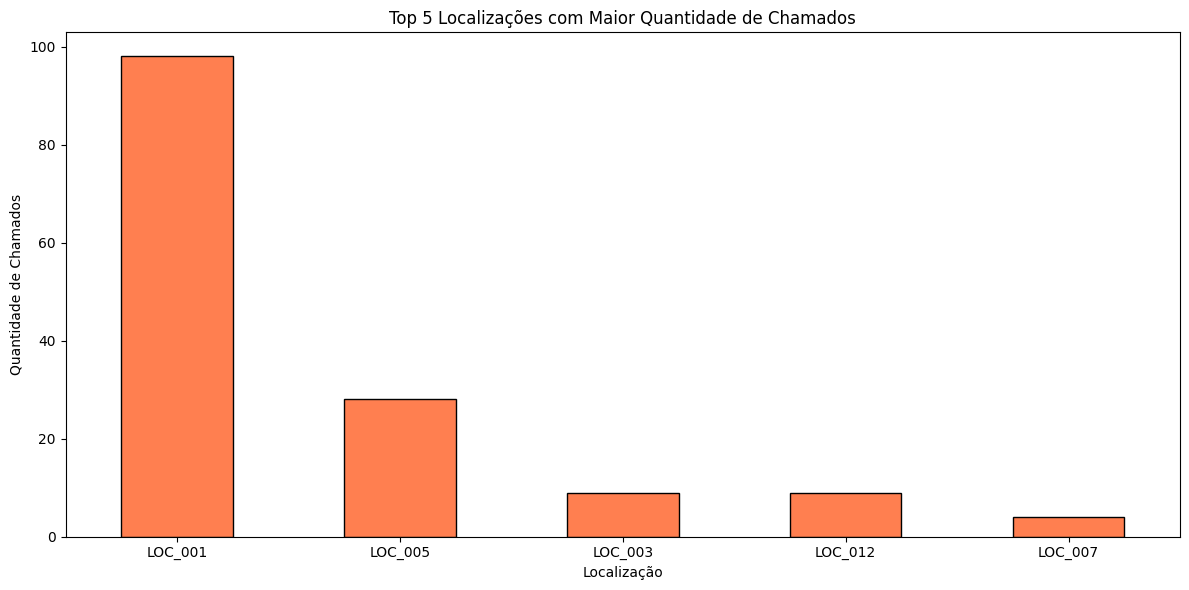

In [ ]:
# Visualização top 5 quantitativo - Localização
plt.figure(figsize=(12, 6))
df_localizacao.head(5).plot(kind='bar', color='coral', edgecolor='black')
plt.title('Top 5 Localizações com Maior Quantidade de Chamados')
plt.xlabel('Localização')
plt.ylabel('Quantidade de Chamados')
plt.xticks(rotation=0)
plt.tight_layout()
# Salvando o gráfico
plt.savefig(r'..\support-tickets-analytics\reports\top5_localizacao_chamados.png')
plt.show()

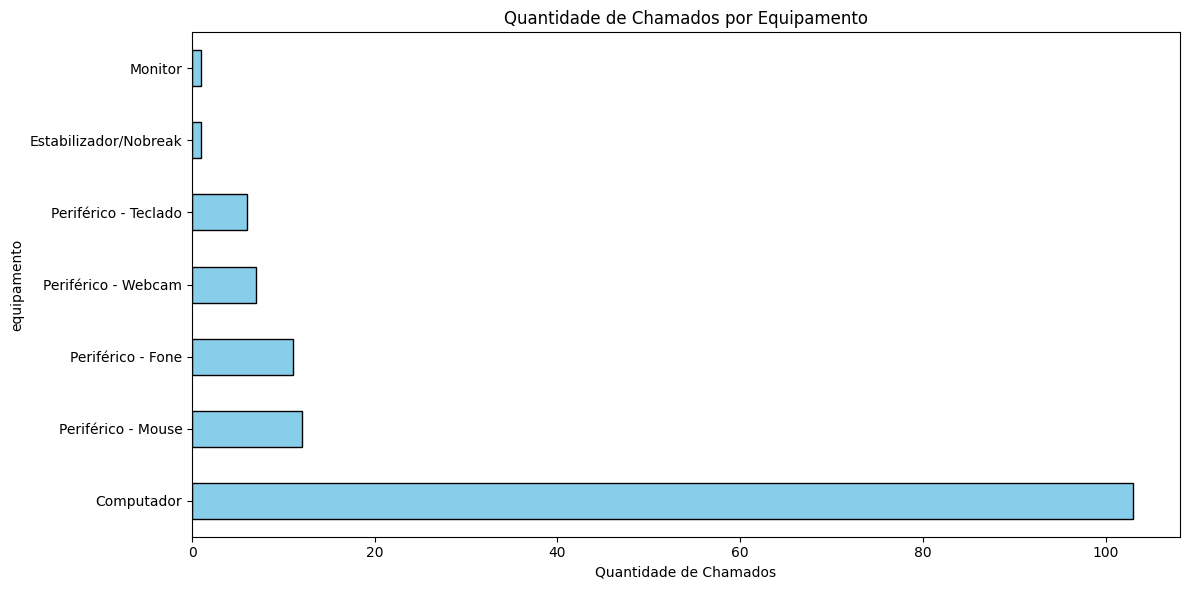

In [ ]:
# Visualização quantitativo - equipamento 
# Visualização horizontal
plt.figure(figsize=(12, 6))
df_equipamento.plot(kind='barh', color='#87CEEB', edgecolor='black')
plt.title('Quantidade de Chamados por Equipamento')
plt.xlabel('Quantidade de Chamados')
plt.tight_layout()
# Salvando o gráfico
plt.savefig(r'..\support-tickets-analytics\reports\quantitativo_chamados_por_equipamento.png')
plt.show()


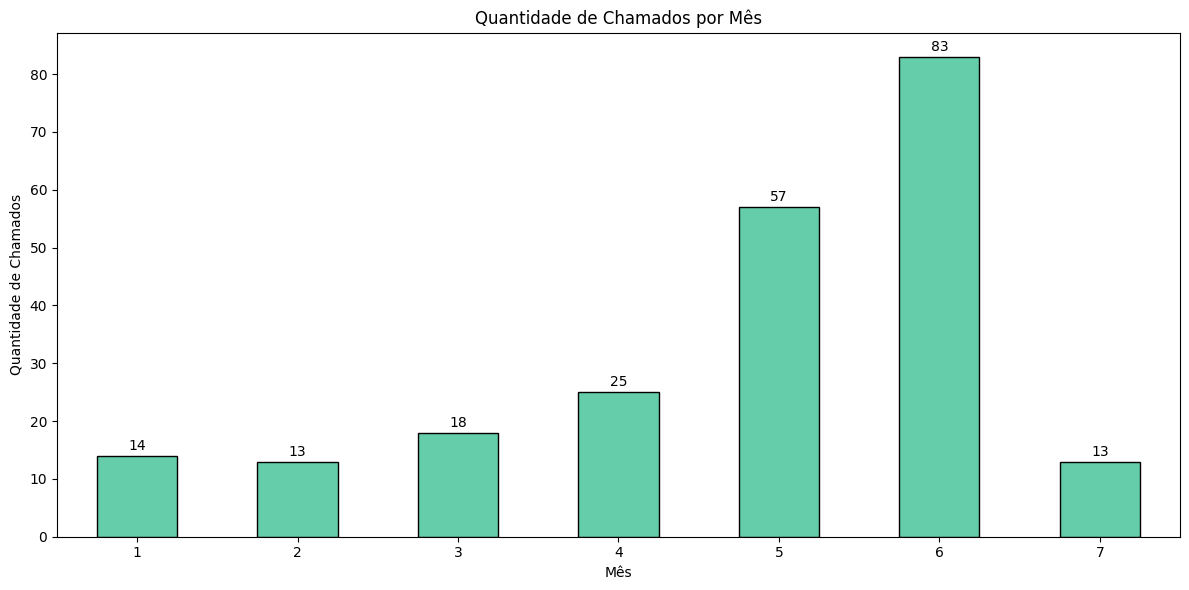

In [ ]:
# Visualização quantitativo - mês
plt.figure(figsize=(12, 6))
bars = df_mes.plot(kind='bar', color='#66CDAA', edgecolor='black')
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.5, 
             int(bar.get_height()), 
             ha='center', va='bottom')
    
plt.title('Quantidade de Chamados por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Chamados')
plt.xticks(rotation=0)
plt.tight_layout()

# Salvando o gráfico
plt.savefig(r'..\support-tickets-analytics\reports\quantitativo_chamados_por_mes.png')
plt.show()


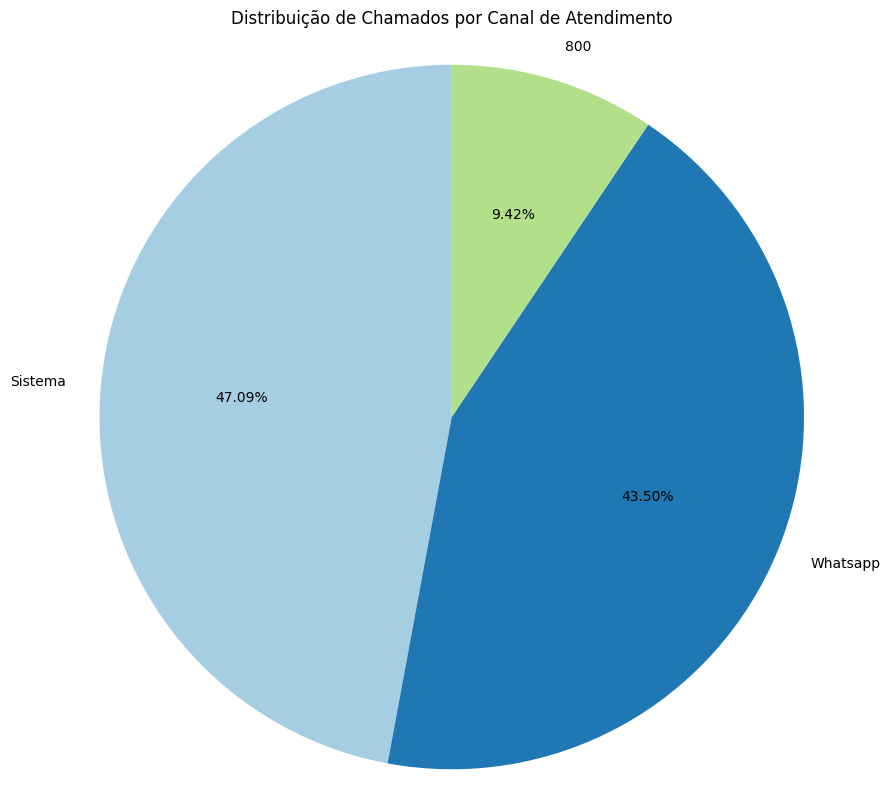

In [ ]:
# Visualização quantitativo - Canal de Atendimento (pizza)
plt.figure(figsize=(10, 10))
plt.pie(df_canal, labels=df_canal.index, autopct='%1.2f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Chamados por Canal de Atendimento')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Salvando o gráfico
plt.savefig(r'..\support-tickets-analytics\reports\distribuicao_chamados_por_canal_atendimento.png')
plt.show()



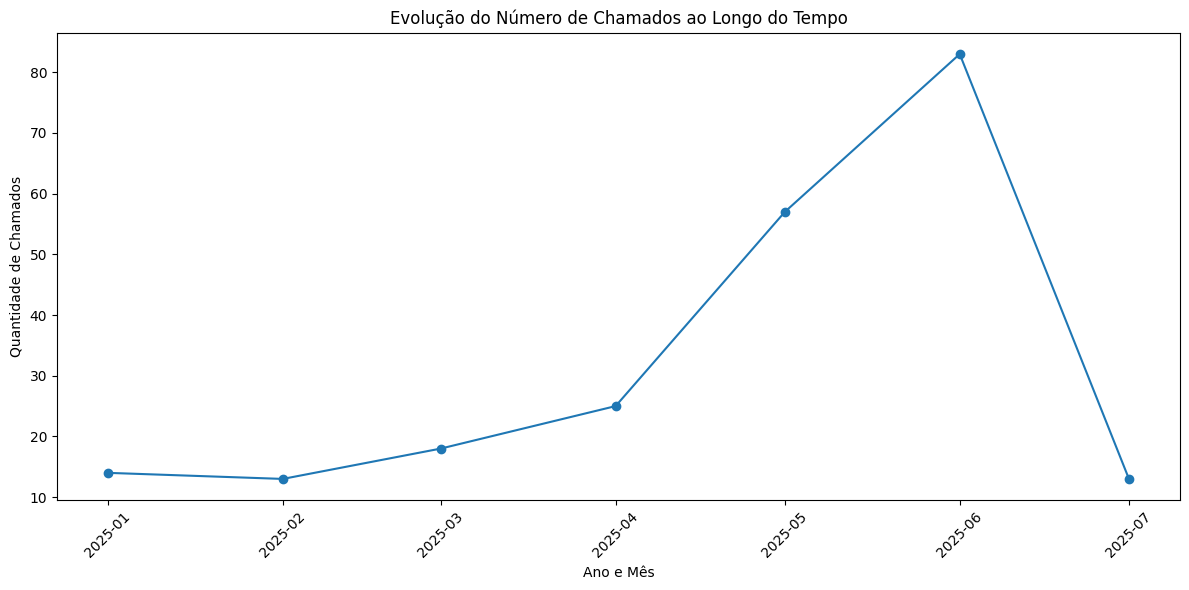

In [ ]:
# Visualização quantitativo - chamados ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df_agregado['data'], df_agregado['quantidade'], marker='o')
plt.title('Evolução do Número de Chamados ao Longo do Tempo')
plt.xlabel('Ano e Mês')
plt.ylabel('Quantidade de Chamados')
plt.xticks(rotation=45)
plt.tight_layout()

# Salvando o gráfico
plt.savefig(r'..\support-tickets-analytics\reports\evolucao_chamados_ao_longo_tempo.png')
plt.show()